## SVARpy: Intuition

This file serves the purpose of visualizing the usage of the SVARpy package, with a specific focus on the SVAR-GMM estimator introduced by Keweloh (2021). The estimator leverages dependency measures such as covariance, coskewness, and cokurtosis to estimate a non-Gaussian SVAR model. It achieves this by disentangling the reduced form shocks into innovations minimizing the  dependency measures.

In [1]:
# Install required packages

# If required pip install SVARpy package
if True:
    !pip install SVARpy

import numpy as np
import matplotlib.pyplot as plt
import SVAR as SVAR
np.random.seed(0)

## Simulate the SVAR

Simulate reduced form shocks $u_t$ from the SVAR

$$
u_t = B_0 ɛ_t
$$

 with $n$ variables, $T$ observations, and structural shocks $ɛ_t$ generated from a uniform distribution.

In [2]:
n = 2  # Number of variables
T = 5000 # Number of observations
# Specitfy B0
B0 = np.array([[np.cos(np.pi/5), np.sin(np.pi/5)], [-np.sin(np.pi/5), np.cos(np.pi/5)]])
# Draw structural shocks
eps = np.empty([T, n])
for i in range(n):
    eps[:, i] = np.random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=T).T
# Generate reduced form shocks u = B eps
u = np.matmul(B0, np.transpose(eps))
u = np.transpose(u)

## Measuring the dependencies of the shocks

The following plot shows the structural form shocks $\epsilon_t$ and the reduced form shocks $u_t$

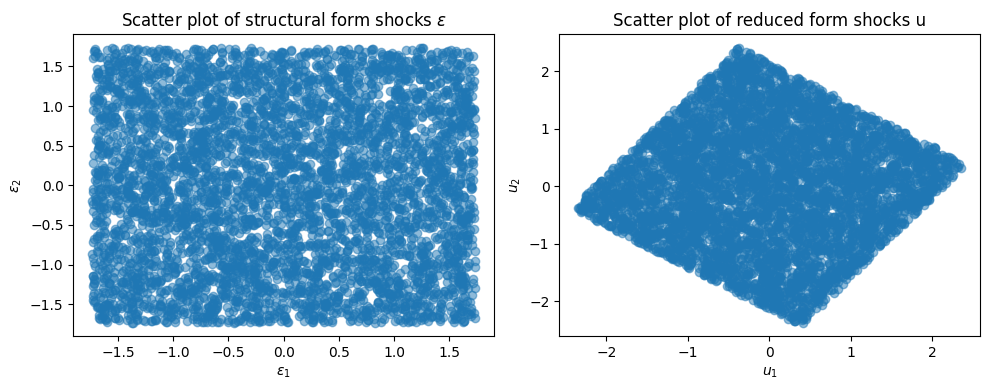

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot for eps
ax1.scatter(eps[:, 0], eps[:, 1], alpha=0.5)
ax1.set_xlabel('$\epsilon_1$')
ax1.set_ylabel('$\epsilon_2$')
ax1.set_title('Scatter plot of structural form shocks $\epsilon$')

# Scatter plot for u
ax2.scatter(u[:, 0], u[:, 1], alpha=0.5)
ax2.set_xlabel('$u_1$')
ax2.set_ylabel('$u_2$')
ax2.set_title('Scatter plot of reduced form shocks u')



# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

The dependency of two random variables $\epsilon_{1t}$ and $\epsilon_{2t}$ or alternatively $u_{1t}$ and $u_{2t}$ can be measured by their covariance, coskewness, and cokurtosis. For independent random variables, all dependency measures below should be close to zero.

Sample covariance:
$$
\frac{1}{T}\sum_{t=1}^{T} \epsilon_{1t}\epsilon_{2t}  \text{ or  }  \frac{1}{T} \sum_{t=1}^{T} u_{1t}u_{2t}
$$

Sample coskewness:
$$
\frac{1}{T}\sum_{t=1}^{T} \epsilon_{1t}^2\epsilon_{2t}  \text{ or  }  \frac{1}{T} \sum_{t=1}^{T} u_{1t}^2u_{2t}
\\
\frac{1}{T} \sum_{t=1}^{T} \epsilon_{1t}\epsilon_{2t}^2  \text{ or  } \frac{1}{T} \sum_{t=1}^{T} u_{1t}u_{2t}^2
$$

Sample cokurtosis:
$$
\frac{1}{T}\sum_{t=1}^{T} \epsilon_{1t}^3\epsilon_{2t}  \text{ or  }  \frac{1}{T} \sum_{t=1}^{T} u_{1t}^3u_{2t}
\\
\frac{1}{T} \sum_{t=1}^{T} \epsilon_{1t}^2\epsilon_{2t}^2-1  \text{ or  } \frac{1}{T} \sum_{t=1}^{T} u_{1t}^2u_{2t}^2-1
\\
\frac{1}{T} \sum_{t=1}^{T} \epsilon_{1t}\epsilon_{2t}^3  \text{ or  } \frac{1}{T} \sum_{t=1}^{T} u_{1t}u_{2t}^3
$$

The code provided below calculates and displays the dependency measures for the simulated structural form shocks, denoted as $\epsilon_t$, and the reduced form shocks, denoted as $u_t$. It is important to note that all dependency measures of the structural form shocks, $\epsilon_t$, are close to zero.
Furthermore, while the reduced form shocks, $u_t$, are also uncorrelated, the cokurtosis moments reveal a clear dependency among them.

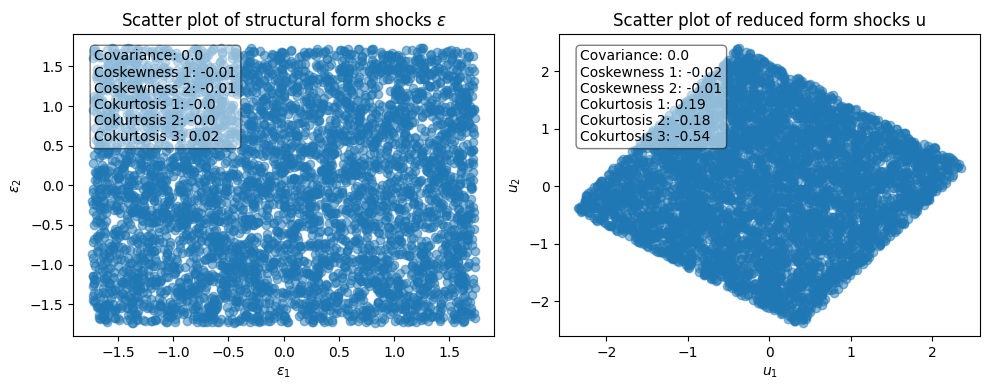

In [4]:

# Calculate sample covariance
covariance_eps = np.round(np.mean(eps[:, 0] * eps[:, 1]), 2)
covariance_u = np.round(np.mean(u[:, 0] * u[:, 1]), 2)

# Calculate sample coskewness
coskewness_eps_1 = np.round(np.mean(eps[:, 0]**2 * eps[:, 1]), 2)
coskewness_eps_2 = np.round(np.mean(eps[:, 0] * eps[:, 1]**2) , 2)
coskewness_u_1 = np.round(np.mean(u[:, 0]**2 * u[:, 1]) , 2)
coskewness_u_2 = np.round(np.mean(u[:, 0] * u[:, 1]**2) , 2)

# Calculate sample cokurtosis
cokurtosis_eps_1 = np.round(np.mean(eps[:, 0]**3 * eps[:, 1]) , 2)
cokurtosis_eps_2 = np.round(np.mean(eps[:, 0] * eps[:, 1]**3) , 2)
cokurtosis_eps_3 = np.round(np.mean(eps[:, 0]**2 * eps[:, 1]**2) - 1, 2)
cokurtosis_u_1 = np.round(np.mean(u[:, 0]**3 * u[:, 1]) , 2)
cokurtosis_u_2 = np.round(np.mean(u[:, 0] * u[:, 1]**3), 2)
cokurtosis_u_3 = np.round(np.mean(u[:, 0]**2 * u[:, 1]**2) - 1, 2)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot for eps
ax1.scatter(eps[:, 0], eps[:, 1], alpha=0.5)
ax1.set_xlabel('$\epsilon_1$')
ax1.set_ylabel('$\epsilon_2$')
ax1.set_title('Scatter plot of structural form shocks $\epsilon$')

# Scatter plot for u
ax2.scatter(u[:, 0], u[:, 1], alpha=0.5)
ax2.set_xlabel('$u_1$')
ax2.set_ylabel('$u_2$')
ax2.set_title('Scatter plot of reduced form shocks u')

# Add a text box for dependency measures
textstr_eps = '\n'.join((f'Covariance: {covariance_eps}',
                        f'Coskewness 1: {coskewness_eps_1}',
                        f'Coskewness 2: {coskewness_eps_2}',
                        f'Cokurtosis 1: {cokurtosis_eps_1}',
                        f'Cokurtosis 2: {cokurtosis_eps_2}',
                        f'Cokurtosis 3: {cokurtosis_eps_3}'))
textstr_u = '\n'.join((f'Covariance: {covariance_u}',
                      f'Coskewness 1: {coskewness_u_1}',
                      f'Coskewness 2: {coskewness_u_2}',
                      f'Cokurtosis 1: {cokurtosis_u_1}',
                      f'Cokurtosis 2: {cokurtosis_u_2}',
                      f'Cokurtosis 3: {cokurtosis_u_3}'))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax1.text(0.05, 0.95, textstr_eps, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', bbox=props)
ax2.text(0.05, 0.95, textstr_u, transform=ax2.transAxes,
         fontsize=10, verticalalignment='top', bbox=props)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()




## SVAR estimation by minimizing the dependencies of the shocks

The function

> SVAR.SVARest(u, estimator)

allows estimating $B_0$ from the reduced form shocks $u_t$ using different estimators relying on moment based higher-order dependency measures.





**Estimator: SVAR-GMM**

The SVAR-GMM estimator proposed in Keweloh (2021) is implemented using:

`estimator='GMM'`

The estimator decomposes the reduced form shocks $u_t$ into innovations $e_t(B) := B^{-1} u_t$, such that the innovations minimize the covariance, coskewness, and cokurtosis conditions described above.

The following code estimates $B_0$ using the two-step SVAR-GMM estimator minimizing the covariance, coskewness, and cokurtosis conditions.

In [5]:
estimator='GMM'
SVAR_out = SVAR.SVARest(u, estimator=estimator)
e = SVAR_out['e']

print("")
print("True B0 matrix:")
print(str(np.round(B0,2)))

Estimator: GMM (steps=2)
Estimator Wopt/Avar: Uncorrelated/Uncorrelated
| SVAR            | Moments     | Tests            | E[e_1^m] / ... / E[e_n^m]     |
|-----------------|-------------|------------------|-------------------------------|
| T=5000          | #second: 3  | WaldRec=5957.72  | m=2: 1.0 / 1.0                |
| n=2             | #third: 2   | WaldRec-pval=0.0 | m=3: -0.0 / -0.05             |
| #restrictions:0 | #fourth: 3  | J=1.56           | m=4: 1.8 / 1.79               |
| #unknowns:4     | ->loss: 0.0 | J-pval=0.82      |                               |
 
|                  |       B(:,1)       |       B(:,2)        |
|------------------|--------------------|---------------------|
|      B(1,:)      |        0.81        |        0.59         |
| (avar/wald/pval) | (0.26/12750.0/0.0) | (0.29/5957.72/0.0)  |
|                  |                    |                     |
|      B(2,:)      |       -0.59        |        0.81         |
| (avar/wald/pval) | (0.29/5917.

The following plot visualizes how the SVAR-GMM estimator rotates the reduced form shocks $u_t$ into innovations $e_t(\hat{B})$ minimizing the higher-order dependency measures.

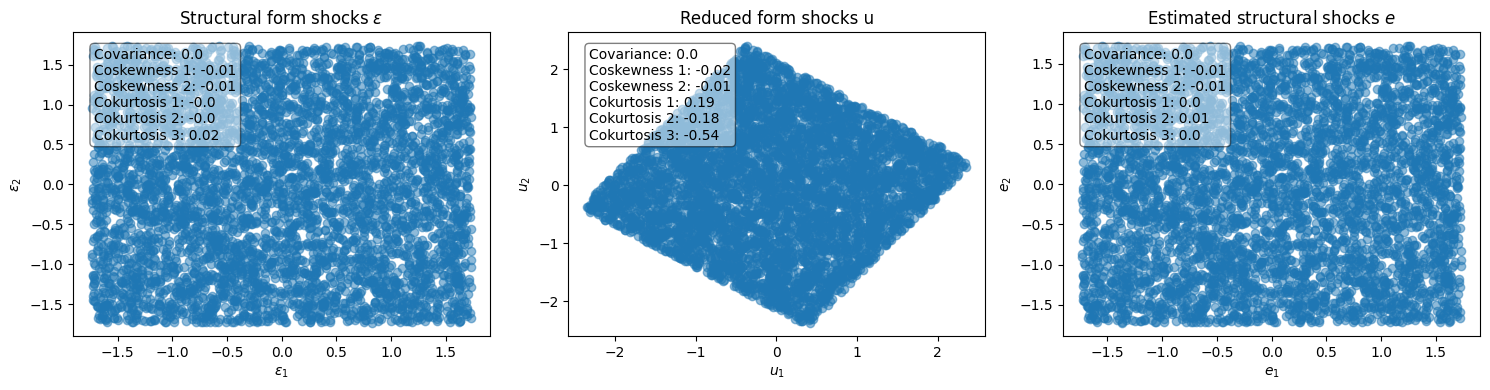

In [21]:

# Calculate sample covariance
covariance_e = np.round(np.mean(e[:, 0] * e[:, 1]), 2)
covariance_u = np.round(np.mean(u[:, 0] * u[:, 1]), 2)

# Calculate sample coskewness
coskewness_e_1 = np.round(np.mean(e[:, 0]**2 * e[:, 1]), 2)
coskewness_e_2 = np.round(np.mean(e[:, 0] * e[:, 1]**2) , 2)
coskewness_u_1 = np.round(np.mean(u[:, 0]**2 * u[:, 1]) , 2)
coskewness_u_2 = np.round(np.mean(u[:, 0] * u[:, 1]**2) , 2)

# Calculate sample cokurtosis
cokurtosis_e_1 = np.round(np.mean(e[:, 0]**3 * e[:, 1]) , 2)
cokurtosis_e_2 = np.round(np.mean(e[:, 0] * e[:, 1]**3) , 2)
cokurtosis_e_3 = np.round(np.mean(e[:, 0]**2 * e[:, 1]**2) - 1, 2)
cokurtosis_u_1 = np.round(np.mean(u[:, 0]**3 * u[:, 1]) , 2)
cokurtosis_u_2 = np.round(np.mean(u[:, 0] * u[:, 1]**3), 2)
cokurtosis_u_3 = np.round(np.mean(u[:, 0]**2 * u[:, 1]**2) - 1, 2)



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot for eps
ax1.scatter(eps[:, 0], eps[:, 1], alpha=0.5)
ax1.set_xlabel('$\epsilon_1$')
ax1.set_ylabel('$\epsilon_2$')
ax1.set_title('Structural form shocks $\epsilon$')


# Scatter plot for u
ax2.scatter(u[:, 0], u[:, 1], alpha=0.5)
ax2.set_xlabel('$u_1$')
ax2.set_ylabel('$u_2$')
ax2.set_title('Reduced form shocks u')

# Scatter plot for e
ax3.scatter(e[:, 0], e[:, 1], alpha=0.5)
ax3.set_xlabel('$e_1$')
ax3.set_ylabel('$e_2$')
ax3.set_title('Estimated structural shocks $e$')

# Add a text box for dependency measures
textstr_eps = '\n'.join((f'Covariance: {covariance_eps}',
                        f'Coskewness 1: {coskewness_eps_1}',
                        f'Coskewness 2: {coskewness_eps_2}',
                        f'Cokurtosis 1: {cokurtosis_eps_1}',
                        f'Cokurtosis 2: {cokurtosis_eps_2}',
                        f'Cokurtosis 3: {cokurtosis_eps_3}'))
textstr_e = '\n'.join((f'Covariance: {covariance_e}',
                        f'Coskewness 1: {coskewness_e_1}',
                        f'Coskewness 2: {coskewness_e_2}',
                        f'Cokurtosis 1: {cokurtosis_e_1}',
                        f'Cokurtosis 2: {cokurtosis_e_2}',
                        f'Cokurtosis 3: {cokurtosis_e_3}'))
textstr_u = '\n'.join((f'Covariance: {covariance_u}',
                      f'Coskewness 1: {coskewness_u_1}',
                      f'Coskewness 2: {coskewness_u_2}',
                      f'Cokurtosis 1: {cokurtosis_u_1}',
                      f'Cokurtosis 2: {cokurtosis_u_2}',
                      f'Cokurtosis 3: {cokurtosis_u_3}'))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax1.text(0.05, 0.95, textstr_eps, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', bbox=props)
ax2.text(0.05, 0.95, textstr_u, transform=ax2.transAxes,
         fontsize=10, verticalalignment='top', bbox=props)
ax3.text(0.05, 0.95, textstr_e, transform=ax3.transAxes,
         fontsize=10, verticalalignment='top', bbox=props)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


## References

Keweloh, Sascha Alexander. "A generalized method of moments estimator for structural vector autoregressions based on higher moments." Journal of Business & Economic Statistics 39.3 (2021): 772-782.